In [1]:
### Jaiden Hausler
### 801053745
### Homework 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta) #gives h in cost function, mx1 array of (theta0 - theta1*x1)
    errors = np.subtract(predictions, y) #gives (h(x^i)-y^i)
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [3]:
def gradient_descent(X, X_test, y, y_test, theta, alpha, iterations, mTrain, mTest): # thetaj = thetaj - alpha*(1/m sum((h(x^i)-y^i)x^i))
    cost_history = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)
    sum_delta = np.zeros(len(theta))
    
    for i in range(iterations):
        predictions = X.dot(theta) #gives h
        loss = np.subtract(predictions, y) #gives (h(x^i)-y^i)
        sum_delta = (alpha / mTrain) * X.transpose().dot(loss); #gives sum( (alpha/m)*((h(x^i)-y^i)x^i) ) output is 1x1
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, mTrain) #recursion
        cost_history_test[i] = compute_cost(X_test, y_test, theta, mTest)
        
    return theta, cost_history, cost_history_test

In [4]:
def gradient_descent_penalty(X, X_test, y, y_test, theta, alpha, iterations, mTrain, mTest, lamda): # thetaj = thetaj - alpha*(1/m sum((h(x^i)-y^i)x^i))
    cost_history = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)
    sum_delta = np.zeros(theta.size)
    
    for i in range(iterations):
        predictions = X.dot(theta) #gives h
        loss = np.subtract(predictions, y) #gives (h(x^i)-y^i)
        for j in range(theta.size):
            sum_delta = (alpha / mTrain) * X.transpose().dot(loss); #gives sum( (alpha/m)*((h(x^i)-y^i)x^i) ) output is 1x1
            if j == 0:
                theta[j] = theta[j] - sum_delta[j];
            else:
                theta[j] = theta[j]*(1 - lamda* (alpha/mTrain)) - sum_delta[j];
        
        
        cost_history[i] = compute_cost(X, y, theta, mTrain) #recursion
        cost_history_test[i] = compute_cost(X_test, y_test, theta, mTest)
        
    return theta, cost_history, cost_history_test

In [5]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
           'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape

(381, 13)

In [8]:
###### Problem 1a ####

In [9]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()


,area,bedrooms,bathrooms,stories,parking,price
126,7160,3,1,1,2,5880000
363,3584,2,1,1,0,3710000
370,4280,2,1,1,2,3640000
31,7000,3,1,4,2,8400000
113,9620,3,1,1,2,6083000


In [10]:
#Train Values 1a
y = df_Newtrain.values[:, 5] # get output values
m = len(y)
x1_train = df_Newtrain.values[:, 0].reshape(m, 1) # get input values from first column
x2_train = df_Newtrain.values[:, 1].reshape(m, 1) # get input values from second column
x3_train = df_Newtrain.values[:, 2].reshape(m, 1) # get input values from third column
x4_train = df_Newtrain.values[:, 3].reshape(m, 1) # get input values from fourth column
x5_train = df_Newtrain.values[:, 4].reshape(m, 1) # get input values from fifth column

X_0 = np.ones((m, 1))
X_1 = np.hstack((X_0, x1_train, x2_train, x3_train, x4_train, x5_train))

#Validation 1a
ytest = df_Newtest.values[:, 5] # get output values
mtest = len(ytest)
x1_test = df_Newtest.values[:, 0].reshape(mtest, 1) # get input values from first column
x2_test = df_Newtest.values[:, 1].reshape(mtest, 1) # get input values from second column
x3_test = df_Newtest.values[:, 2].reshape(mtest, 1) # get input values from third column
x4_test = df_Newtest.values[:, 3].reshape(mtest, 1) # get input values from fourth column
x5_test = df_Newtest.values[:, 4].reshape(mtest, 1) # get input values from fifth column

X_0Test = np.ones((mtest, 1))
X_1Test = np.hstack((X_0Test, x1_test, x2_test, x3_test, x4_test, x5_test))

In [11]:
theta = [0., 0., 0., 0., 0., 0.]
iterations=100;
alpha=0.00000001;

theta,cost_history, cost_history_test=gradient_descent(
    X_1, X_1Test, y, ytest, theta, alpha, iterations, m, mtest)
print('Final value of theta =',theta)

Final value of theta = [5.15890168e-01 8.55611925e+02 1.82808174e+00 9.31186293e-01
 1.42228342e+00 4.22300391e-01]


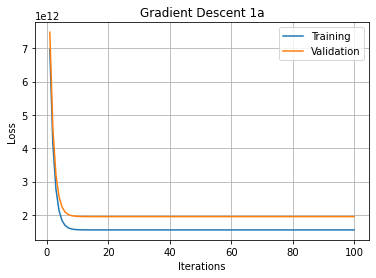

In [12]:
plt.figure(1)
plt.plot(range(1, iterations + 1), cost_history, label = 'Training')
plt.plot(range(1, iterations + 1), cost_history_test, label = 'Validation')
plt.grid()
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent 1a')
plt.rcParams["figure.figsize"]=(10,6)

In [13]:
###############Problem 1b#################3

In [14]:
num_vars2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 
            'mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain2 = df_train[num_vars2]
df_Newtest2 = df_test[num_vars2]
df_Newtrain2.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,7160,3,1,1,2,1,0,1,0,0,2,1,5880000
363,3584,2,1,1,0,1,0,0,1,0,0,0,3710000
370,4280,2,1,1,2,1,0,0,0,1,2,0,3640000
31,7000,3,1,4,2,1,0,0,0,1,2,0,8400000
113,9620,3,1,1,2,1,0,1,0,0,2,1,6083000


In [15]:
#Training values 1b
y2 = df_Newtrain2.values[:, 12] # get output values
m2 = len(y)
x1_train2 = df_Newtrain2.values[:, 0].reshape(m2, 1) # get input values
x2_train2 = df_Newtrain2.values[:, 1].reshape(m2, 1) # get input values
x3_train2 = df_Newtrain2.values[:, 2].reshape(m2, 1) # get input values
x4_train2 = df_Newtrain2.values[:, 3].reshape(m2, 1) # get input values
x5_train2 = df_Newtrain2.values[:, 4].reshape(m2, 1) # get input values
x6_train2 = df_Newtrain2.values[:, 5].reshape(m2, 1) # get input values
x7_train2 = df_Newtrain2.values[:, 6].reshape(m2, 1) # get input values
x8_train2 = df_Newtrain2.values[:, 7].reshape(m2, 1) # get input values
x9_train2 = df_Newtrain2.values[:, 8].reshape(m2, 1) # get input values
x10_train2 = df_Newtrain2.values[:, 9].reshape(m2, 1) # get input values
x11_train2 = df_Newtrain2.values[:, 10].reshape(m2, 1) # get input values
x12_train2 = df_Newtrain2.values[:, 11].reshape(m2, 1) # get input values

X_02 = np.ones((m2, 1))
X_2 = np.hstack((X_02, x1_train2, x2_train2, x3_train2, x4_train2, x5_train2,
                x6_train2, x7_train2, x8_train2, x9_train2, x10_train2, x11_train2
                , x12_train2))

#test values 1b
ytest2 = df_Newtest2.values[:, 12] # get output values
mtest2 = len(ytest2)
x1_test2 = df_Newtest2.values[:, 0].reshape(mtest2, 1) # get input values
x2_test2 = df_Newtest2.values[:, 1].reshape(mtest2, 1) # get input values
x3_test2 = df_Newtest2.values[:, 2].reshape(mtest2, 1) # get input values
x4_test2 = df_Newtest2.values[:, 3].reshape(mtest2, 1) # get input values 
x5_test2 = df_Newtest2.values[:, 4].reshape(mtest2, 1) # get input values
x6_test2 = df_Newtest2.values[:, 5].reshape(mtest2, 1) # get input values
x7_test2 = df_Newtest2.values[:, 6].reshape(mtest2, 1) # get input values 
x8_test2 = df_Newtest2.values[:, 7].reshape(mtest2, 1) # get input values 
x9_test2 = df_Newtest2.values[:, 8].reshape(mtest2, 1) # get input values 
x10_test2 = df_Newtest2.values[:, 9].reshape(mtest2, 1) # get input values 
x11_test2 = df_Newtest2.values[:, 10].reshape(mtest2, 1) # get input values 
x12_test2 = df_Newtest2.values[:, 11].reshape(mtest2, 1) # get input values 

X_02Test = np.ones((mtest2, 1))
X_2Test = np.hstack((X_02Test, x1_test2, x2_test2, x3_test2, x4_test2, x5_test2,
                    x6_test2, x7_test2, x8_test2, x9_test2, x10_test2, x11_test2,
                    x12_test2))

In [74]:
theta2 = np.zeros(13)
iterations2=200;
alpha2=0.000000001;

theta2,cost_history2, cost_history_test2=gradient_descent(
    X_2, X_2Test, y2, ytest2, theta2, alpha2, iterations2,  m2, mtest2)
print('Final value of theta =',theta2)

Final value of theta = [2.16051339e-01 8.54048130e+02 7.04926660e-01 3.33074345e-01
 4.88464582e-01 1.72907921e-01 1.89454900e-01 5.74373455e-02
 1.08564885e-01 1.74259310e-02 1.10322353e-01 1.72907921e-01
 6.60666799e-02]


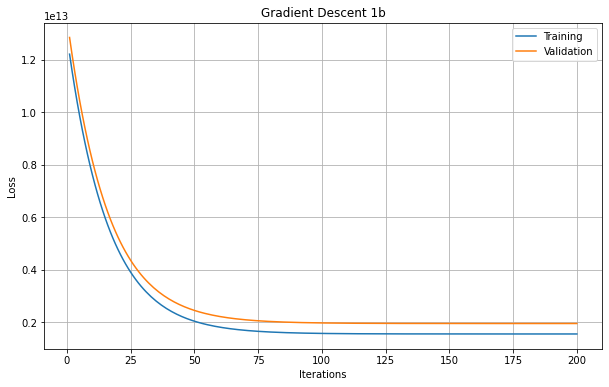

In [75]:
plt.figure(2)
plt.plot(range(1, iterations2 + 1), cost_history2, label = 'Training')
plt.plot(range(1, iterations2 + 1), cost_history_test2, label = 'Validation')
plt.grid()
plt.title('Gradient Descent 1b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)

In [18]:
###############Problem 2#############

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler

# define standard scaler
scalerStandard = StandardScaler()
scalerNormal =MinMaxScaler()

In [20]:
###########Normalization - Problem 2a##########

In [21]:
df_Newtrain5 = df_train[num_vars]
df_Newtest5 = df_test[num_vars]
df_Newtrain5[num_vars] = scalerNormal.fit_transform(df_Newtrain5[num_vars])
df_Newtest5[num_vars] = scalerNormal.fit_transform(df_Newtest5[num_vars])
df_Newtrain5.head()

,area,bedrooms,bathrooms,stories,parking,price
126,0.378694,0.4,0.0,0.0,0.666667,0.393333
363,0.132921,0.2,0.0,0.0,0.000000,0.186667
370,0.180756,0.2,0.0,0.0,0.666667,0.180000
31,0.367698,0.4,0.0,1.0,0.666667,0.633333
113,0.547766,0.4,0.0,0.0,0.666667,0.412667


In [22]:
#Training values Normalization -2a
y5 = df_Newtrain5.values[:, 5] # get output values
m5 = len(y)
x1_train5 = df_Newtrain5.values[:, 0].reshape(m5, 1) # get input values
x2_train5 = df_Newtrain5.values[:, 1].reshape(m5, 1) # get input values
x3_train5 = df_Newtrain5.values[:, 2].reshape(m5, 1) # get input values
x4_train5 = df_Newtrain5.values[:, 3].reshape(m5, 1) # get input values
x5_train5 = df_Newtrain5.values[:, 4].reshape(m5, 1) # get input values

X_05 = np.ones((m5, 1))
X_5 = np.hstack((X_05, x1_train5, x2_train5, x3_train5, x4_train5, x5_train5))

#Test values Normalization - 2a
ytest5 = df_Newtest5.values[:, 5] # get output values
mtest5 = len(ytest5)
x1_test5 = df_Newtest5.values[:, 0].reshape(mtest5, 1) # get input values from first column
x2_test5 = df_Newtest5.values[:, 1].reshape(mtest5, 1) # get input values from second column
x3_test5 = df_Newtest5.values[:, 2].reshape(mtest5, 1) # get input values from third column
x4_test5 = df_Newtest5.values[:, 3].reshape(mtest5, 1) # get input values from fourth column
x5_test5 = df_Newtest5.values[:, 4].reshape(mtest5, 1) # get input values from fifth column

X_05Test = np.ones((mtest5, 1))
X_5Test = np.hstack((X_05Test, x1_test5, x2_test5, x3_test5, x4_test5, x5_test5))

In [23]:
theta5 = [0., 0., 0., 0., 0., 0.]
iterations5=1500;
alpha5=0.01;

theta5,cost_history5, cost_history_test5=gradient_descent(
    X_5, X_5Test, y5, ytest5, theta5, alpha5, iterations5,  m5, mtest5)
print('Final value of theta =',theta5)

Final value of theta = [0.1299687  0.16673146 0.10803689 0.13621252 0.13843466 0.13571984]


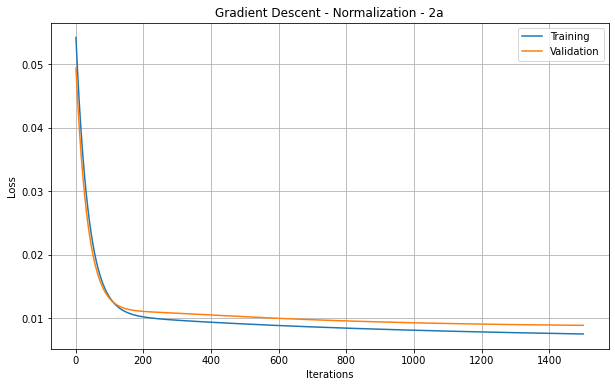

In [24]:
plt.figure(3)
plt.plot(range(1, iterations5 + 1), cost_history5, label = 'Training')
plt.plot(range(1, iterations5 + 1), cost_history_test5, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Normalization - 2a')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [25]:
######Standardization - Problem 2a######

In [26]:
df_Newtrain6 = df_train[num_vars]
df_Newtest6 = df_test[num_vars]
df_Newtrain6[num_vars] = scalerStandard.fit_transform(df_Newtrain6[num_vars])
df_Newtest6[num_vars] = scalerStandard.fit_transform(df_Newtest6[num_vars])
df_Newtrain6.head()

,area,bedrooms,bathrooms,stories,parking,price
126,0.934301,0.055861,-0.553238,-0.907660,1.591603,0.630538
363,-0.710246,-1.274325,-0.553238,-0.907660,-0.800511,-0.593759
370,-0.390167,-1.274325,-0.553238,-0.907660,1.591603,-0.633253
31,0.860719,0.055861,-0.553238,2.573733,1.591603,2.052301
113,2.065617,0.055861,-0.553238,-0.907660,1.591603,0.745068


In [27]:
#Training values Standardization - 2a
y6 = df_Newtrain6.values[:, 5] # get output values
m6 = len(y)
x1_train6 = df_Newtrain6.values[:, 0].reshape(m6, 1) # get input values
x2_train6 = df_Newtrain6.values[:, 1].reshape(m6, 1) # get input values
x3_train6 = df_Newtrain6.values[:, 2].reshape(m6, 1) # get input values
x4_train6 = df_Newtrain6.values[:, 3].reshape(m6, 1) # get input values
x5_train6 = df_Newtrain6.values[:, 4].reshape(m6, 1) # get input values

X_06 = np.ones((m6, 1))
X_6 = np.hstack((X_06, x1_train6, x2_train6, x3_train6, x4_train6, x5_train6))

#Test values Standardization - 2a
ytest6 = df_Newtest6.values[:, 5] # get output values
mtest6 = len(ytest6)
x1_test6 = df_Newtest6.values[:, 0].reshape(mtest6, 1) # get input values from first column
x2_test6 = df_Newtest6.values[:, 1].reshape(mtest6, 1) # get input values from second column
x3_test6 = df_Newtest6.values[:, 2].reshape(mtest6, 1) # get input values from third column
x4_test6 = df_Newtest6.values[:, 3].reshape(mtest6, 1) # get input values from fourth column
x5_test6 = df_Newtest6.values[:, 4].reshape(mtest6, 1) # get input values from fifth column

X_06Test = np.ones((mtest6, 1))
X_6Test = np.hstack((X_06Test, x1_test6, x2_test6, x3_test5, x4_test6, x5_test6))

In [78]:
theta6 = np.zeros(6)
iterations6=1500;
alpha6=0.01;

theta6,cost_history6, cost_history_test6=gradient_descent(
    X_6, X_6Test, y6, ytest6, theta6, alpha6, iterations6,  m6, mtest6)
print('Final value of theta =',theta6)

Final value of theta = [1.07041818e-16 4.03969394e-01 6.83520452e-02 3.19609439e-01
 2.29714811e-01 1.86551214e-01]


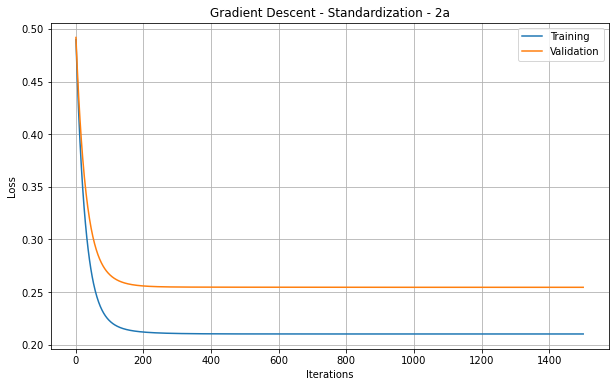

In [79]:
plt.figure(3)
plt.plot(range(1, iterations6 + 1), cost_history6, label = 'Training')
plt.plot(range(1, iterations6 + 1), cost_history_test6, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Standardization - 2a')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [30]:
#######Normalization - Problem 2b#########

In [31]:
df_Newtrain3 = df_train[num_vars2]
df_Newtrain3[num_vars2] = scalerNormal.fit_transform(df_Newtrain3[num_vars2])
df_Newtest3 = df_test[num_vars2]
df_Newtest3[num_vars2] = scalerNormal.fit_transform(df_Newtest3[num_vars2])
df_Newtrain3.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,0.378694,0.4,0.0,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.393333
363,0.132921,0.2,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.186667
370,0.180756,0.2,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.180000
31,0.367698,0.4,0.0,1.0,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.633333
113,0.547766,0.4,0.0,0.0,0.666667,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.412667


In [32]:
#Training values - Normalization 2b
y3 = df_Newtrain3.values[:, 12] # get output values
m3 = len(y)
x1_train3 = df_Newtrain3.values[:, 0].reshape(m, 1) # get input values
x2_train3 = df_Newtrain3.values[:, 1].reshape(m, 1) # get input values
x3_train3 = df_Newtrain3.values[:, 2].reshape(m, 1) # get input values
x4_train3 = df_Newtrain3.values[:, 3].reshape(m, 1) # get input values
x5_train3 = df_Newtrain3.values[:, 4].reshape(m, 1) # get input values
x6_train3 = df_Newtrain3.values[:, 5].reshape(m, 1) # get input values
x7_train3 = df_Newtrain3.values[:, 6].reshape(m, 1) # get input values
x8_train3 = df_Newtrain3.values[:, 7].reshape(m, 1) # get input values
x9_train3 = df_Newtrain3.values[:, 8].reshape(m, 1) # get input values
x10_train3 = df_Newtrain3.values[:, 9].reshape(m, 1) # get input values
x11_train3 = df_Newtrain3.values[:, 10].reshape(m, 1) # get input values
x12_train3 = df_Newtrain3.values[:, 11].reshape(m, 1) # get input values

X_03 = np.ones((m3, 1))
X_3 = np.hstack((X_03, x1_train3, x2_train3, x3_train3, x4_train3, x5_train3,
                x6_train3, x7_train3, x8_train3, x9_train3, x10_train3, x11_train3
                , x12_train3))

#test values Normalization 2b
ytest3 = df_Newtest3.values[:, 12] # get output values
mtest3 = len(ytest3)
x1_test3 = df_Newtest3.values[:, 0].reshape(mtest3, 1) # get input values
x2_test3 = df_Newtest3.values[:, 1].reshape(mtest3, 1) # get input values
x3_test3 = df_Newtest3.values[:, 2].reshape(mtest3, 1) # get input values
x4_test3 = df_Newtest3.values[:, 3].reshape(mtest3, 1) # get input values 
x5_test3 = df_Newtest3.values[:, 4].reshape(mtest3, 1) # get input values
x6_test3 = df_Newtest3.values[:, 5].reshape(mtest3, 1) # get input values
x7_test3 = df_Newtest3.values[:, 6].reshape(mtest3, 1) # get input values 
x8_test3 = df_Newtest3.values[:, 7].reshape(mtest3, 1) # get input values 
x9_test3 = df_Newtest3.values[:, 8].reshape(mtest3, 1) # get input values 
x10_test3 = df_Newtest3.values[:, 9].reshape(mtest3, 1) # get input values 
x11_test3 = df_Newtest3.values[:, 10].reshape(mtest3, 1) # get input values 
x12_test3 = df_Newtest3.values[:, 11].reshape(mtest3, 1) # get input values 

X_03Test = np.ones((mtest3, 1))
X_3Test = np.hstack((X_03Test, x1_test3, x2_test3, x3_test3, x4_test3, x5_test3,
                    x6_test3, x7_test3, x8_test3, x9_test3, x10_test3, x11_test3,
                    x12_test3))

In [86]:
theta3 = np.zeros(13)

iterations3=1700;
alpha3=0.01;

theta3,cost_history3, cost_history_test3 =gradient_descent(
    X_3, X_3Test, y3, ytest3, theta3, alpha3, iterations3,  m3, mtest3)
print('Final value of theta =',theta3)

Final value of theta = [0.04511239 0.11949745 0.07328995 0.13020205 0.11578356 0.06488418
 0.05660141 0.04316925 0.04237767 0.04286351 0.08979833 0.06488418
 0.05434169]


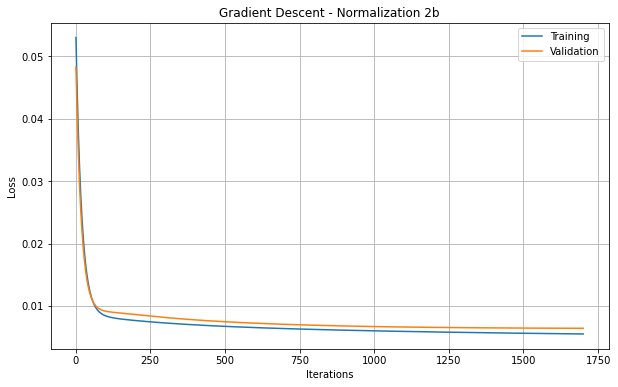

In [87]:
plt.figure(3)
plt.plot(range(1, iterations3 + 1), cost_history3, label = 'Training')
plt.plot(range(1, iterations3 + 1), cost_history_test3, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Normalization 2b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [35]:
###########Standardization - Problem 2b###########

In [36]:
df_Newtrain4 = df_train[num_vars2]
df_Newtrain4[num_vars2] = scalerStandard.fit_transform(df_Newtrain4[num_vars2])
df_Newtest4 = df_test[num_vars2]
df_Newtest4[num_vars2] = scalerStandard.fit_transform(df_Newtest4[num_vars2])
df_Newtrain4.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,0.934301,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.591603,1.798147,0.630538
363,-0.710246,-1.274325,-0.553238,-0.907660,-0.800511,0.397561,-0.478573,-0.749317,4.248529,-0.682191,-0.800511,-0.556128,-0.593759
370,-0.390167,-1.274325,-0.553238,-0.907660,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.591603,-0.556128,-0.633253
31,0.860719,0.055861,-0.553238,2.573733,1.591603,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.591603,-0.556128,2.052301
113,2.065617,0.055861,-0.553238,-0.907660,1.591603,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.591603,1.798147,0.745068


In [37]:
#training values Standardization 2b
y4 = df_Newtrain4.values[:, 12] # get output values
m4 = len(y4)
x1_train4 = df_Newtrain4.values[:, 0].reshape(m, 1) # get input values
x2_train4 = df_Newtrain4.values[:, 1].reshape(m, 1) # get input values
x3_train4 = df_Newtrain4.values[:, 2].reshape(m, 1) # get input values
x4_train4 = df_Newtrain4.values[:, 3].reshape(m, 1) # get input values
x5_train4 = df_Newtrain4.values[:, 4].reshape(m, 1) # get input values
x6_train4 = df_Newtrain4.values[:, 5].reshape(m, 1) # get input values
x7_train4 = df_Newtrain4.values[:, 6].reshape(m, 1) # get input values
x8_train4 = df_Newtrain4.values[:, 7].reshape(m, 1) # get input values
x9_train4 = df_Newtrain4.values[:, 8].reshape(m, 1) # get input values
x10_train4 = df_Newtrain4.values[:, 9].reshape(m, 1) # get input values
x11_train4 = df_Newtrain4.values[:, 10].reshape(m, 1) # get input values
x12_train4 = df_Newtrain4.values[:, 11].reshape(m, 1) # get input values

X_04 = np.ones((m4, 1))
X_4 = np.hstack((X_04, x1_train4, x2_train4, x3_train4, x4_train4, x5_train4,
                x6_train4, x7_train4, x8_train4, x9_train4, x10_train4,
                 x11_train4, x12_train4))

#test values Standardization 2b
ytest4 = df_Newtest4.values[:, 12] # get output values
mtest4 = len(ytest4)
x1_test4 = df_Newtest4.values[:, 0].reshape(mtest4, 1) # get input values
x2_test4 = df_Newtest4.values[:, 1].reshape(mtest4, 1) # get input values
x3_test4 = df_Newtest4.values[:, 2].reshape(mtest4, 1) # get input values
x4_test4 = df_Newtest4.values[:, 3].reshape(mtest4, 1) # get input values 
x5_test4 = df_Newtest4.values[:, 4].reshape(mtest4, 1) # get input values
x6_test4 = df_Newtest4.values[:, 5].reshape(mtest4, 1) # get input values
x7_test4 = df_Newtest4.values[:, 6].reshape(mtest4, 1) # get input values 
x8_test4 = df_Newtest4.values[:, 7].reshape(mtest4, 1) # get input values 
x9_test4 = df_Newtest4.values[:, 8].reshape(mtest4, 1) # get input values 
x10_test4 = df_Newtest4.values[:, 9].reshape(mtest4, 1) # get input values 
x11_test4 = df_Newtest4.values[:, 10].reshape(mtest4, 1) # get input values 
x12_test4 = df_Newtest4.values[:, 11].reshape(mtest4, 1) # get input values 

X_04Test = np.ones((mtest4, 1))
X_4Test = np.hstack((X_04Test, x1_test4, x2_test4, x3_test4, x4_test4, x5_test4,
                    x6_test4, x7_test4, x8_test4, x9_test4, x10_test4, x11_test4,
                    x12_test4))

In [38]:
theta4 = np.zeros(13)
iterations4=500;
alpha4=0.01;

theta4,cost_history4, cost_history_test4 =gradient_descent(
    X_4, X_4Test, y4, ytest4, theta4, alpha4, iterations4,  m4, mtest4)
print('Final value of theta =',theta4)

Final value of theta = [5.98558823e-17 3.06852165e-01 4.98916000e-02 2.98342882e-01
 2.00178622e-01 7.56902490e-02 9.26663879e-02 7.24154707e-02
 1.30668782e-01 8.20473911e-02 1.87048274e-01 7.56902490e-02
 1.23921424e-01]


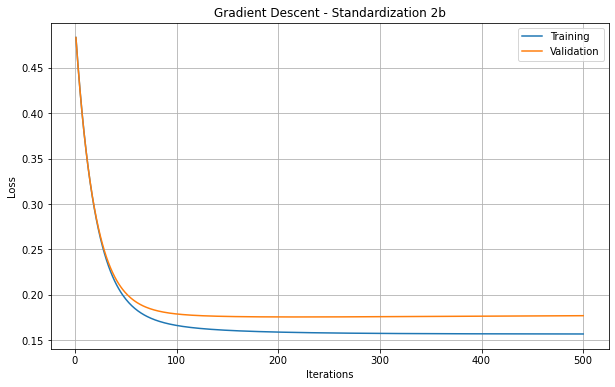

In [39]:
plt.figure(3)
plt.plot(range(1, iterations4 + 1), cost_history4, label ='Training')
plt.plot(range(1, iterations4 + 1), cost_history_test4, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Standardization 2b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [40]:
##################Problem 3a - Normalizations#########

In [88]:
theta7 = np.zeros(6)
iterations7=1700;
alpha7=0.01;
lamda7 = 0.99

theta7,cost_history7, cost_history_test7=gradient_descent_penalty(
    X_5, X_5Test, y5, ytest5, theta7, alpha7, iterations7,  m5, mtest5, lamda7)
print('Final value of theta =',theta7)

Final value of theta = [0.12600263 0.17515688 0.10720097 0.14449405 0.14028825 0.13800605]


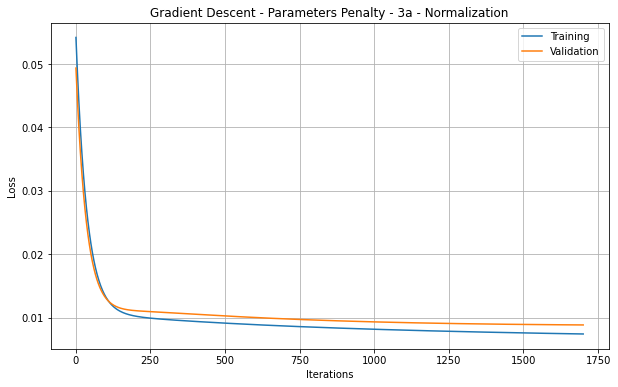

In [89]:
plt.figure(3)
plt.plot(range(1, iterations7 + 1), cost_history7, label ='Training')
plt.plot(range(1, iterations7 + 1), cost_history_test7, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Parameters Penalty - 3a - Normalization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [48]:
##################Problem 3a - Standardization#########

In [58]:
theta8 = np.zeros(6)
iterations8=1700;
alpha8=0.01;
lamda8 = 1

theta8,cost_history8, cost_history_test8=gradient_descent_penalty(
    X_6, X_6Test, y6, ytest6, theta8, alpha8, iterations8,  m6, mtest6, lamda8)
print('Final value of theta =',theta8)

Final value of theta = [1.04334739e-16 4.03051950e-01 6.87842418e-02 3.18959812e-01
 2.29225872e-01 1.86407904e-01]


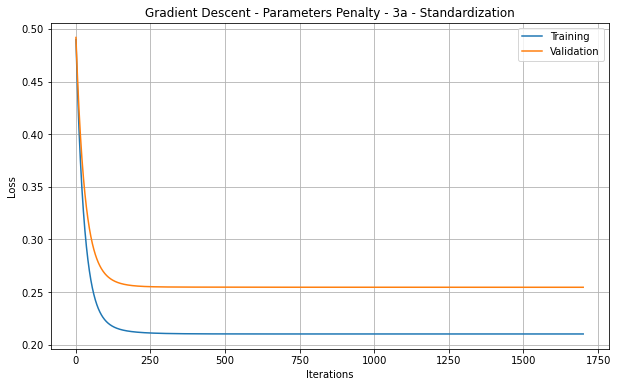

In [90]:
plt.figure(3)
plt.plot(range(1, iterations8 + 1), cost_history8, label ='Training')
plt.plot(range(1, iterations8 + 1), cost_history_test8, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Parameters Penalty - 3a - Standardization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [60]:
##################Problem 3b - Normalizations#########

In [95]:
theta9 = np.zeros(13)
lamda9 = 1
iterations9=800;
alpha9=0.01;

theta9,cost_history9, cost_history_test9 =gradient_descent_penalty(
    X_3, X_3Test, y3, ytest3, theta9, alpha9, iterations9,  m3, mtest3, lamda9)
print('Final value of theta =',theta9)

Final value of theta = [0.06849423 0.0759271  0.06230386 0.07733317 0.08912285 0.05844994
 0.06798219 0.04130005 0.04100869 0.02661289 0.09118157 0.05844994
 0.04937696]


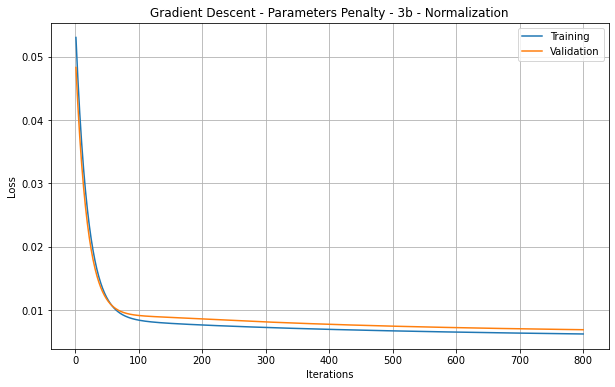

In [96]:
plt.figure(3)
plt.plot(range(1, iterations9 + 1), cost_history9, label ='Training')
plt.plot(range(1, iterations9 + 1), cost_history_test9, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Parameters Penalty - 3b - Normalization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)

In [64]:
##################Problem 3b - Standardization#########

In [97]:
theta10 = np.zeros(13)
iterations10=800;
alpha10=0.01;
lamda10 = 1;

theta10,cost_history10, cost_history_test10 =gradient_descent_penalty(
    X_4, X_4Test, y4, ytest4, theta10, alpha10, iterations10,  m4, mtest4, lamda10)
print('Final value of theta =',theta10)

Final value of theta = [6.95739762e-17 3.11600315e-01 4.08547061e-02 3.00618995e-01
 2.07122884e-01 7.53320926e-02 8.90079906e-02 6.75275101e-02
 1.36782624e-01 8.22194940e-02 1.85307261e-01 7.53320926e-02
 1.23871068e-01]


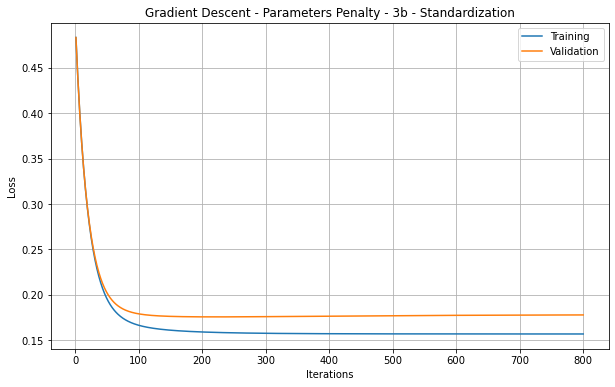

In [99]:
plt.figure(3)
plt.plot(range(1, iterations10 + 1), cost_history10, label ='Training')
plt.plot(range(1, iterations10 + 1), cost_history_test10, label = 'Validation')
plt.grid()
plt.legend()
plt.title('Gradient Descent - Parameters Penalty - 3b - Standardization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.rcParams["figure.figsize"]=(10,6)